<a href="https://colab.research.google.com/github/sanath8107/strategies/blob/main/VWAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#VWAP(Volume weighted average price)
#Author (Sanath Ramesh)

This strategy is similary to mean crossover, but this takes the volume traded into consideration.
Formula for weighted average = (sigma(price)*volume)/sigma(volume)

**Suggested only for intraday trading.**

  1. Find the average price the stock traded at over the first five-minute period of the day. To do this, add the high, low, and close, then divide by three. Multiply this by the volume for that period. Record the result in a spreadsheet, under column PV.
  2. Divide PV by the volume for that period. This will give the VWAP value.
  3. To maintain the VWAP value throughout the day, continue to add the PV value from each period to the prior values. Divide this total by total volume up to that point. To make this easier in a spreadsheet, create columns for cumulative PV and cumulative volume. Both these cumulative values are divided by each other to produce VWAP.


In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

In [2]:
from google.colab import files
uploaded = files.upload()

Saving WIPRO-2017.csv to WIPRO-2017.csv


In [3]:
#store the data into a df
df = pd.read_csv('WIPRO-2017.csv')
#set the date to be the index
df = df.set_index(pd.DatetimeIndex(df['Date'].values))
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2017-01-02,2017-01-02,475.05,478.4,470.50,471.10,471.55,461428.0,2189.63
2017-01-03,2017-01-03,473.00,474.1,465.70,467.75,467.00,691301.0,3244.45
2017-01-04,2017-01-04,467.00,477.6,466.10,477.05,475.60,1134495.0,5366.42
2017-01-05,2017-01-05,477.10,485.9,477.10,480.55,480.40,978187.0,4715.90
2017-01-06,2017-01-06,478.50,480.1,469.00,469.60,469.95,1571573.0,7417.73
...,...,...,...,...,...,...,...,...
2017-12-22,2017-12-22,298.00,303.4,296.05,301.50,301.60,1758584.0,5281.33
2017-12-26,2017-12-26,301.25,307.0,298.15,304.00,302.90,1855536.0,5601.42
2017-12-27,2017-12-27,303.90,308.0,300.05,306.60,306.60,1815733.0,5522.55
2017-12-28,2017-12-28,305.90,309.9,302.50,305.90,308.00,5047272.0,15475.48


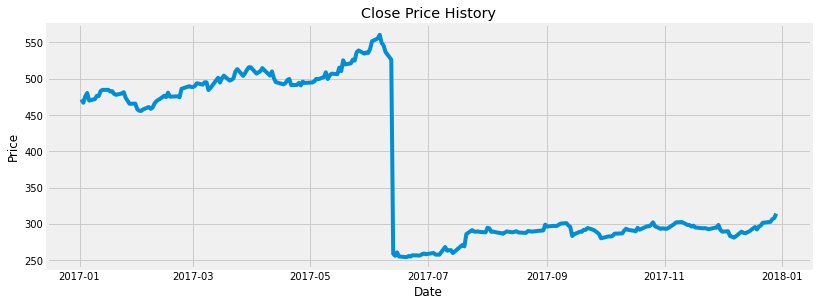

In [4]:
#Visually show the stock price
plt.figure(figsize=(12.2,4.5))
plt.plot(df['Close'], label='Close')
plt.title('Close Price History')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [ ]:
#Calculate the MACD and Signal Line indicators
#calculate the short term exponential moving average (EMA)
ShortEMA=df.Close.ewm(span=12,adjust=False).mean()
#Calculate the long term exponential moving average(EMA)
LongEMA = df.Close.ewm(span=26,adjust=False).mean()
#Calculate the MACD line
MACD = ShortEMA - LongEMA
#Calculate the signal line
signal = MACD.ewm(span=9,adjust=False).mean()

In [ ]:
#plot the chart
plt.figure(figsize=(12.2,4.5))
plt.plot(df.index,MACD,label='PDD MACD',color='red')
plt.plot(df.index,signal,label='Signal Line',color = 'blue')
plt.legend(loc='upper left')
plt.show()